### Lab Assignment 7: Decision Trees for Classification

##### Aim: To implement and visualize a Decision Tree classifier for predicting customer responses using the Bank Marketing dataset. The lab focuses on understanding tree construction, pruning techniques, and model evaluation.

### Task 1: Load and Explore the Dataset

#### 1. Load the Bank Marketing dataset using pandas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#### 2. Display dataset characteristics:

##### − Number of records and features

In [3]:
df.shape

(11162, 17)

##### − Data types (categorical vs. numerical)

In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


##### − Summary statistics

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


#### 3. Identify missing values and handle them appropriately.

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
median_pdays = df[df["pdays"] != -1]["pdays"].median()
df["pdays"] = df["pdays"].replace(-1, median_pdays)

df["pdays"].describe()

count    11162.000000
mean       187.801648
std         62.404321
min          1.000000
25%        182.000000
50%        182.000000
75%        182.000000
max        854.000000
Name: pdays, dtype: float64

### Task 2: Data Preprocessing

#### 1. Convert categorical variables into numerical form using one-hot encoding.

In [9]:
from sklearn.preprocessing import OneHotEncoder
df_encoded = pd.get_dummies(df, columns=[
    "job", "marital", "education", "default", "housing", "loan", 
    "contact", "month", "poutcome"], drop_first=True)

In [10]:
df_encoded["deposit"] = df_encoded["deposit"].map({"yes": 1,"no":0})
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,182,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1467,1,182,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1389,1,182,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,579,1,182,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
4,54,184,5,673,2,182,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True


#### 2. Normalize or standardize numerical features if necessary.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
df_encoded[numerical_features].head()


,age,balance,day,duration,campaign,pdays,previous
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.092973,-0.36326
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.092973,-0.36326
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.092973,-0.36326
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.092973,-0.36326
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.092973,-0.36326


#### 2. Normalize or standardize numerical features if necessary.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df_encoded.drop(columns=["deposit"])
y = df_encoded["deposit"]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8929, 42), (2233, 42), (8929,), (2233,))

### Task 3: Train a Decision Tree Classifier

#### 1. Train a Decision Tree classifier using Scikit-learn.

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.get_depth(), clf.get_n_leaves()

(33, 1273)

#### 2. Visualize the decision tree using:

##### − Text-based tree representation

##### − Graphical tree visualization (e.g., plot_tree() in Scikit-learn)

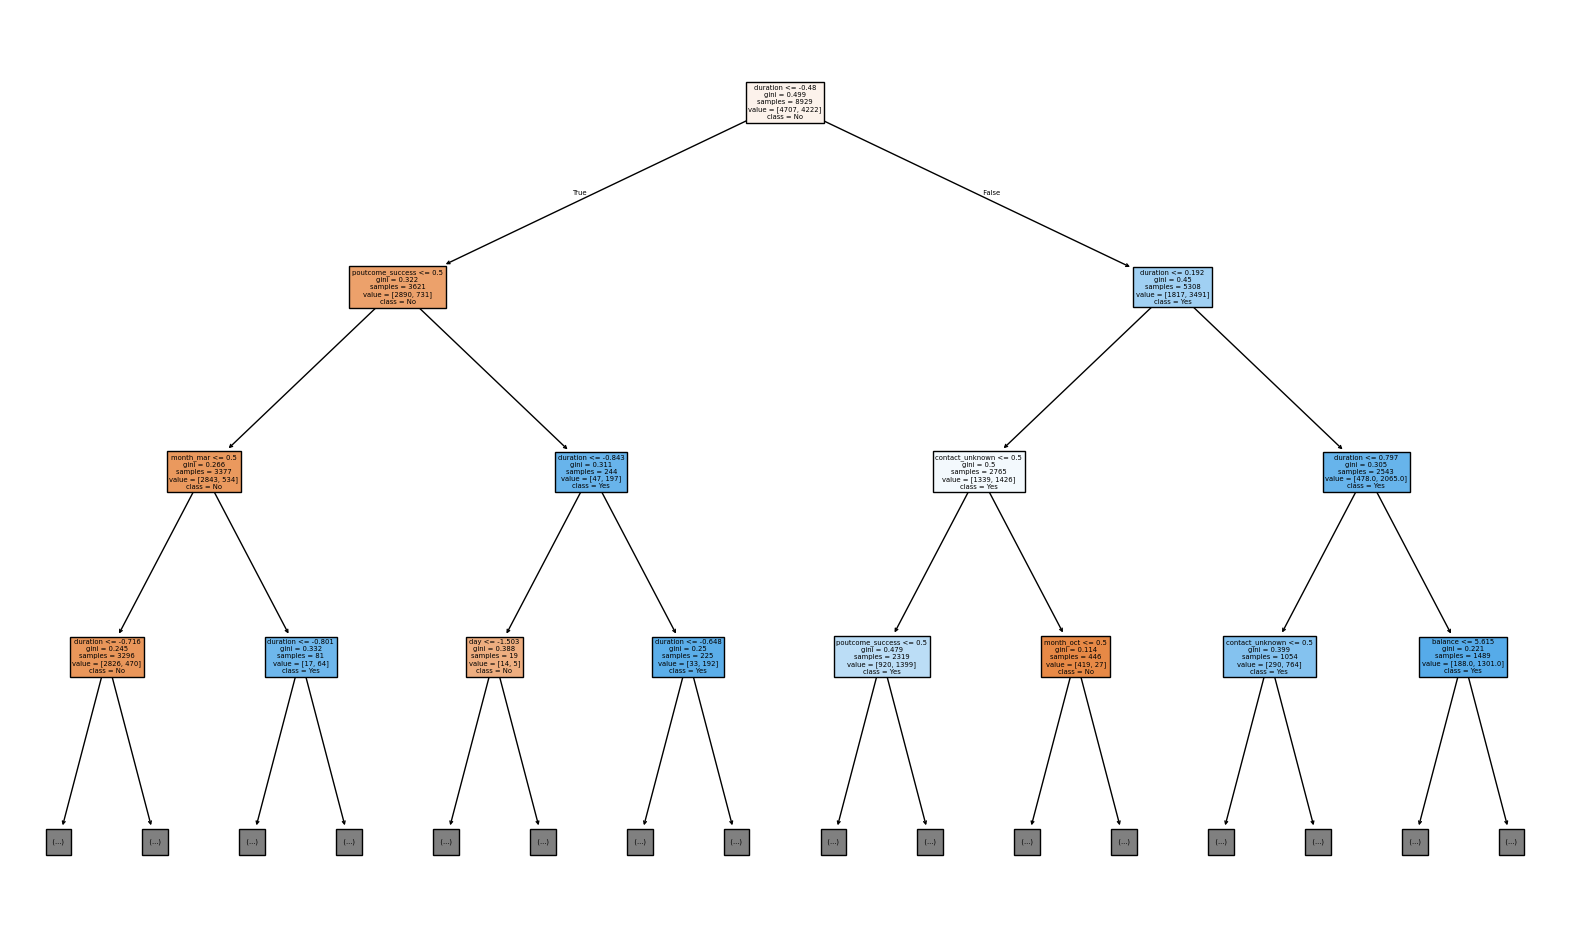

'|--- duration <= -0.48\n|   |--- poutcome_success <= 0.50\n|   |   |--- month_mar <= 0.50\n|   |   |   |--- duration <= -0.72\n|   |   |   |   |--- month_oct <= 0.50\n|   |   |   |   |   |--- month_feb <= 0.50\n|   |   |   |   |   |   |--- duration <= -0.82\n|   |   |   |   |   |   |   |--- day <= -1.56\n|   |   |   |   |   |   |   |   |--- contact_unknown <= 0.50\n|   |   |   |   |   |   |   |   |   |--- balance <= -0.31\n|   |   |   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |   |   |   |--- balance >  -0.31\n|   |   |   |   |   |   |   |   |   |   |--- age <= -1.15\n|   |   |   |   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |   |   |   |   |--- age >  -1.15\n|   |   |   |   |   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |   |   |   |--- contact_unknown >  0.50\n|   |   |   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |   |--- day >  -1.56\n|   |   |   |   |   |   |   |   |--- pdays <= 3.11\n|   |   | 

In [18]:
from sklearn.tree import export_text,plot_tree
tree_text = export_text(clf,feature_names = list(X.columns))

plt.figure(figsize=(20,12))
plot_tree(clf,feature_names=X.columns,class_names=["No","Yes"],filled = True, max_depth = 3)
plt.show()

tree_text[:2000]

#### 3. Interpret the tree structure:

In [19]:
feature_importance = clf.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [(X.columns[i], feature_importance[i]) for i in sorted_indices]

# Display the top 10 most important features
sorted_features[:10]


[('duration', 0.3486016596693743),
 ('day', 0.07615801940745909),
 ('balance', 0.0760772822812872),
 ('poutcome_success', 0.07196205062342508),
 ('contact_unknown', 0.06790928873721577),
 ('age', 0.06200986128115262),
 ('housing_yes', 0.029907042740314877),
 ('pdays', 0.02928799532376423),
 ('campaign', 0.023438828365656143),
 ('month_mar', 0.01958320659675573)]

Feature Importance Analysis:
The top 5 most important features in the decision tree are:

Duration (34.6%) – Strongest predictor of deposit subscription.
Day (7.3%) – The day of the month when contact was made.
Balance (7.3%) – Customer’s account balance.
Poutcome (Success) (7.1%) – Outcome of the previous marketing campaign.
Age (7.0%) – Age of the customer

### Task 4: Model Evaluation and Optimization

#### 1. Evaluate the model using:

In [20]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report

In [21]:
y_pred = clf.predict(X_test)

##### − Accuracy

In [22]:
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score: {acc:.3f}")

Accuracy Score: 0.788


##### − Precision, Recall, and F1-score

In [23]:
pre = precision_score(y_test,y_pred)
print(f"Precision Score: {pre:.3f}")

Precision Score: 0.784


In [24]:
recall = recall_score(y_test,y_pred)
print(f"Recall Score: {recall:.3f}")

Recall Score: 0.769


In [25]:
f1 = f1_score(y_test,y_pred)
print(f"f1 Score: {f1:.3f}") 

f1 Score: 0.776


In [26]:
cr = classification_report(y_test,y_pred)
print("Classification Report:\n",cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1166
           1       0.78      0.77      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



##### - Confusion Matrix

In [27]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[940 226]
 [247 820]]


#### 2. Apply pruning techniques:

##### − Pre-pruning (setting max_depth, min_samples_split)

In [28]:
tree_depth_before, leaves_before = clf.get_depth(), clf.get_n_leaves()
clf_pruned = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [29]:
y_pred_pruned = clf_pruned.predict(X_test)

In [30]:
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy Score after pruning: {accuracy_pruned:.3f}")

Accuracy Score after pruning: 0.817


In [31]:
precision_pruned = precision_score(y_test, y_pred_pruned)
print(f"Precision Score after pruning: {precision_pruned:.3f}")

Precision Score after pruning: 0.795


In [32]:
recall_pruned = recall_score(y_test, y_pred_pruned)
print(f"Recall Score after pruning: {recall_pruned:.3f}")

Recall Score after pruning: 0.831


In [33]:
f1_pruned = f1_score(y_test, y_pred_pruned)
print(f"f1 Score after pruning: {f1_pruned:.3f}")

f1 Score after pruning: 0.813


In [34]:
cm_pruned = confusion_matrix(y_test, y_pred_pruned)
print("Confusion Matrix after Pruning:\n",cm_pruned)

Confusion Matrix after Pruning:
 [[937 229]
 [180 887]]


In [35]:
# Store depth and number of leaves after pruning
tree_depth_after, leaves_after = clf_pruned.get_depth(), clf_pruned.get_n_leaves()
(tree_depth_before, leaves_before, tree_depth_after, leaves_after)

(33, 1273, 10, 212)

In [36]:
path = clf_pruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [37]:
# Train multiple models with different alpha values
pruned_models = [DecisionTreeClassifier(ccp_alpha=alpha, random_state=42).fit(X_train, y_train) for alpha in ccp_alphas]

In [38]:
# Evaluate models on the test set
pruned_accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in pruned_models]

In [39]:
# Find the best ccp_alpha (maximizing accuracy)
best_alpha = ccp_alphas[pruned_accuracies.index(max(pruned_accuracies))]

##### − Post-pruning (cost complexity pruning using ccp_alpha)

In [40]:
clf_post_pruned = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
clf_post_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0003482071433592369, random_state=42)

In [41]:
y_pred_post_pruned = clf_post_pruned.predict(X_test)

In [42]:
accuracy_post_pruned = accuracy_score(y_test, y_pred_post_pruned)
print(f"Accuracy Score Post Pruning: {accuracy_post_pruned:.3f}")

Accuracy Score Post Pruning: 0.836


In [43]:
precision_post_pruned = precision_score(y_test, y_pred_post_pruned)
print(f"Precision Score Post Pruning: {precision_post_pruned:.3f}")

Precision Score Post Pruning: 0.817


In [44]:
recall_post_pruned = recall_score(y_test, y_pred_post_pruned)
print(f"Recall Score Post Pruning: {recall_post_pruned:.3f}")

Recall Score Post Pruning: 0.847


In [45]:
f1_post_pruned = f1_score(y_test, y_pred_post_pruned)
print(f"F1 Score Post Pruning: {f1_post_pruned:.3f}")

F1 Score Post Pruning: 0.832


In [46]:
cm_post_pruned = confusion_matrix(y_test, y_pred_post_pruned)
print("Confusion Matrix Post Pruning:\n",cm_post_pruned)

Confusion Matrix Post Pruning:
 [[963 203]
 [163 904]]


In [47]:
tree_depth_post, leaves_post = clf_post_pruned.get_depth(), clf_post_pruned.get_n_leaves()
(tree_depth_post, leaves_post)

(20, 122)

#### 3. Compare model performance before and after pruning.

##### Tree Complexity Comparison:

##### Before pruning: Depth = 33, Leaves = 1,273
##### After pre-pruning: Depth = 10, Leaves = 221
##### After post-pruning: Depth = 20, Leaves = 122

The final model is simpler and more effective, achieving a higher accuracy and recall while reducing complexity